# NYC Taxi Trip Duration

In [40]:
#EXTRA CODE
from sklearn.metrics import mean_squared_log_error

ImportError: cannot import name mean_squared_log_error

# Loading Training Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from datetime import datetime #This is for object to datetime conversion
import time
import seaborn as sns #To conduct visual analysis
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float
from geopy.distance import vincenty #for calculating Distance
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_log_error
from sklearn.ensemble import ExtraTreesRegressor
from ggplot import *
import math

pd.options.display.float_format = '{:,.15f}'.format

#input_file = "e:/sundog-consult/udemy/datascience/PastHires.csv"
train_file = "E:/GoogleDrive/Interests/Machine_Learning/KAGGLE_COMPETITIONS/train/train.csv"
weather_file = "E:/GoogleDrive/Interests/Machine_Learning/KAGGLE_COMPETITIONS/train/Weather_NYC_Data.csv"
result_file = "E:/GoogleDrive/Interests/Machine_Learning/KAGGLE_COMPETITIONS/train/result.csv"


df = pd.read_csv(train_file, header = 0)
df_w = pd.read_csv(weather_file, header = 0)

df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191392,40.767936706542969,-73.964630126953125,40.765602111816406,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238267,40.738563537597656,-73.999481201171875,40.731151580810547,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433580,40.763938903808594,-74.005332946777344,40.710086822509773,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719970703125000,-74.012268066406250,40.706718444824219,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209075927727,-73.972923278808594,40.782520294189453,N,435


Converting Datetime values from Object to Datetime

In [2]:
def min_bucket_func(row):
    if row < 300 :
        return 5
    elif row < 300*2 :
        return 10
    elif row < 300*3 :
        return 15
    elif row < 300*4 :
        return 20
    elif row < 300*5 :
        return 25
    elif row < 300*6 :
        return 30
    elif row < 300*7 :
        return 35
    elif row < 300*8 :
        return 40
    elif row < 300*9 :
        return 45
    elif row < 300*10 :
        return 50                         
    elif row < 300*11 :
        return 55                         
    elif row < 300*12 :
        return 60
    elif row < 300*13 :
        return 65
    elif row < 300*14 :
        return 70
    elif row < 300*15 :
        return 75
    elif row < 300*16 :
        return 80
    elif row < 300*17 :
        return 85
    elif row < 300*18 :
        return 90
    elif row < 300*19 :
        return 95
    elif row < 300*20 :
        return 100
    elif row < 300*21 :
        return 105
    elif row < 300*22 :
        return 110
    elif row < 300*23 :
        return 115
    elif row < 300*24 :
        return 120
    else:
        return 200    
df['within_min_range']=df['trip_duration'].apply(lambda x: min_bucket_func(x))

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df_w['Date'] = pd.to_datetime(df_w['Date'])

d={'Y':1 , 'N':0}
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(d)
df['total_distance'] = df.apply(lambda x: vincenty((x['pickup_longitude'],x['pickup_latitude']), (x['dropoff_longitude'],   x['dropoff_latitude'])).feet, axis=1).astype(int)


print "The deed is done"

The deed is done


Make a separate column for Month and Date

In [3]:
df['Date']=df['pickup_datetime'].dt.year.map(str)+'-'+df['pickup_datetime'].dt.month.map(str)+'-'+df['pickup_datetime'].dt.day.map(str)
df['Date']=pd.to_datetime(df['Date'])
df_w['Date']=pd.to_datetime(df_w['Date'])

print "The deed is done"

The deed is done


Let's join weather data:

In [4]:
df_join=df[df['within_min_range']<130].merge(df_w, on='Date', how='inner')

print "The deed is done"
df_join.head()

The deed is done


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,vishigh,visavg,vislow,windhigh,windavg,preceiphigh,precipsum,Events,Precip,Snow
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191392,40.767936706542969,-73.964630126953125,40.765602111816406,0,...,10,8,3,24,13,37,0.000000000000000,,0.290000000000000,0.000000000000000
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090026855469,40.758766174316406,-73.953201293945312,40.765068054199219,0,...,10,8,3,24,13,37,0.000000000000000,,0.290000000000000,0.000000000000000
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994483947753906,40.745086669921882,-73.998992919921875,40.722709655761719,0,...,10,8,3,24,13,37,0.000000000000000,,0.290000000000000,0.000000000000000
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944358825683580,40.714488983154297,-73.910530090332031,40.709491729736328,0,...,10,8,3,24,13,37,0.000000000000000,,0.290000000000000,0.000000000000000
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952880859375000,40.766468048095696,-73.978630065917969,40.761920928955078,0,...,10,8,3,24,13,37,0.000000000000000,,0.290000000000000,0.000000000000000


# Data Analysis

Check which columns are numeric in data

Data types:

In [5]:
df.dtypes

id                              object
vendor_id                        int64
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count                  int64
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
store_and_fwd_flag               int64
trip_duration                    int64
num_pickup_datetime              int64
num_dropoff_datetime             int64
total_distance                   int32
dtype: object

Finding missing values:

In [7]:
df.count() 

id                    1458644
vendor_id             1458644
pickup_datetime       1458644
dropoff_datetime      1458644
passenger_count       1458644
pickup_longitude      1458644
pickup_latitude       1458644
dropoff_longitude     1458644
dropoff_latitude      1458644
store_and_fwd_flag    1458644
trip_duration         1458644
dtype: int64

So we have do not have any missing data in this data set.

Data range for data is:

In [37]:
print "pickup_datetime min is " + df['pickup_datetime'].min() + " and max is " + df['pickup_datetime'].max()
print "dropoff_datetime min is " + df['dropoff_datetime'].min() + " and max is " + df['dropoff_datetime'].max()
print "trip_duration min is " + str(df['trip_duration'].min()) + " and max is " + str(df['trip_duration'].max())
#print df.loc[[978383]]


pickup_datetime min is 2016-01-01 00:00:17 and max is 2016-06-30 23:59:39
dropoff_datetime min is 2016-01-01 00:03:31 and max is 2016-07-01 23:02:03
trip_duration min is 1 and max is 3526282


Let's see if we the uniqueness in data

In [2]:
df.apply(pd.Series.nunique)



id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

# Strip Off Non Numeric Columns

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nonnumeric_cols=df_join.select_dtypes(exclude=numerics).columns.values
print "Non numeric columns to look out for: " + str(nonnumeric_cols)

Non numeric columns to look out for: ['id' 'pickup_datetime' 'dropoff_datetime' 'Date' 'Events']


Do we need these? Let's say no for now

In [6]:
df_join = df_join.drop(['id','pickup_datetime','dropoff_datetime','Events'],axis=1)
print "Non-numeric columns dropped"

Non-numeric columns dropped


# Fixing missing values..

Let's see if we have any missing values anywhere

In [ ]:
df_join.isnull().values.any()

# Free up Memory

In [7]:
#Release memory
del df
#del df_join

# Visualization:

Let us see now if there is any relationship between average monthly temperature versus trip duration and total_distance

Correlation between average daily temperature and total trip duration covered is: 0.645687235493
Correlation between average daily temperature and total distance covered is: 0.488147161639
Correlation between average daily temperature and total rides is: 0.0702330533882


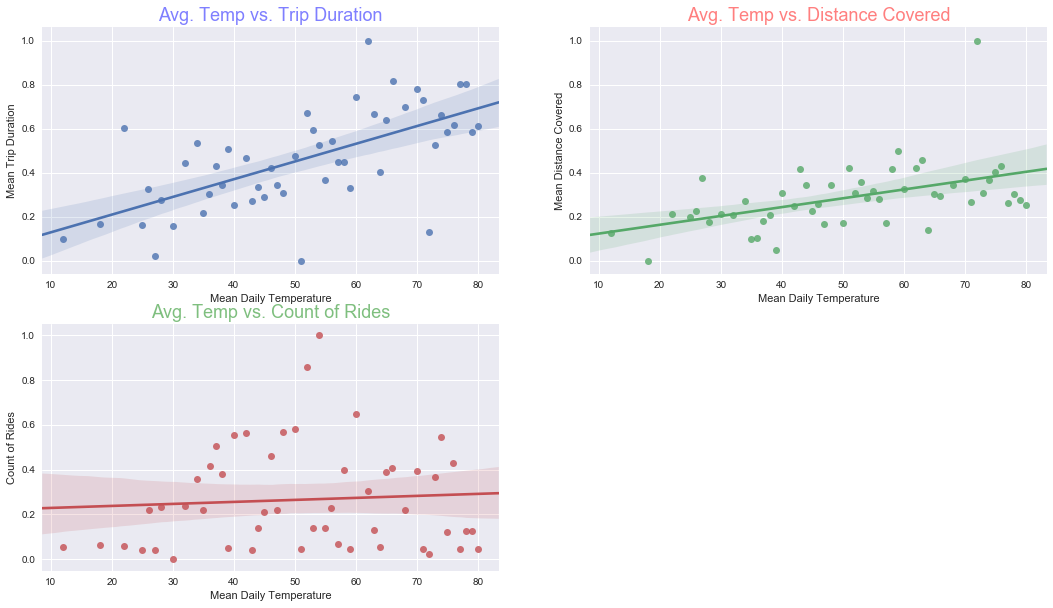

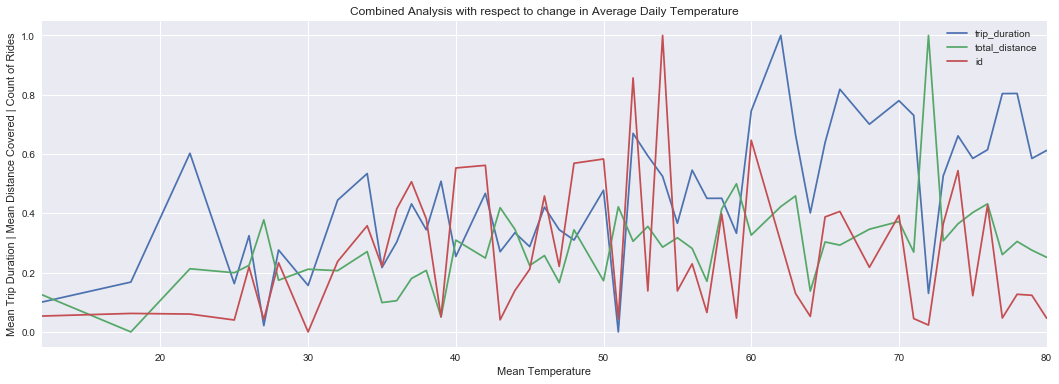

In [131]:
#Aggregation and Joins:
df_bar = df_join.groupby('tempavg', as_index=False)['trip_duration','total_distance'].mean()
df_bar_count21 = df_join.groupby(['tempavg','Date'], as_index=False)['id'].count()
df_bar_count = df_bar_count21.groupby(['tempavg'], as_index=False)['id'].sum()
df_bar_join=df_bar.merge(df_bar_count, on='tempavg', how='inner')

#Scaling:
features_to_scale = ['trip_duration','total_distance','id']
df_bar_join[features_to_scale] -= df_bar_join[features_to_scale].min()  # equivalent to df = df - df.min()
df_bar_join[features_to_scale] /= df_bar_join[features_to_scale].max() 

#Plotting:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

sns.regplot(x='tempavg',y='trip_duration',data=df_bar_join,fit_reg=True, ax=ax1)
sns.regplot(x='tempavg',y='total_distance',data=df_bar_join,fit_reg=True, ax=ax2)
sns.regplot(x='tempavg',y='id',data=df_bar_join,fit_reg=True, ax=ax3)

ax1.set(xlabel='Mean Daily Temperature', ylabel='Mean Trip Duration')
ax2.set(xlabel='Mean Daily Temperature', ylabel='Mean Distance Covered')
ax3.set(xlabel='Mean Daily Temperature', ylabel='Count of Rides')
ax1.set_title('Avg. Temp vs. Trip Duration', fontsize=18,color="b",alpha=0.5)
ax2.set_title('Avg. Temp vs. Distance Covered', fontsize=18,color="r",alpha=0.5)
ax3.set_title('Avg. Temp vs. Count of Rides', fontsize=18,color="g",alpha=0.5)

#Combined Graph:
ax = df_bar_join.plot(x='tempavg',figsize=(18, 6),title = 'Combined Analysis with respect to change in Average Daily Temperature')
ax.set_ylabel('Mean Trip Duration | Mean Distance Covered | Count of Rides')
ax.set_xlabel('Mean Temperature')

#Coorelation Analysis:
print 'Correlation between average daily temperature and total trip duration covered is: '+ str(pd.to_numeric(df_bar_join['tempavg']).corr(df_bar_join['trip_duration']))
print 'Correlation between average daily temperature and total distance covered is: '+ str(pd.to_numeric(df_bar_join['tempavg']).corr(df_bar_join['total_distance']))
print 'Correlation between average daily temperature and total rides is: '+ str(pd.to_numeric(df_bar_join['tempavg']).corr(df_bar_join['id']))


We can make three assumptions here:

When the average daily goes up, there is gradual increase in :

1- Total distance covered is slightly correlated to increase in temperature
2- Total trip Duration is relatively more correlated to increase in temperature
3- Temperature increase does not have any significant impact on total number of rides

Keeping in view point number 3, we can attribute total increase in duration and distance to increase in traffic. Causes for this increase are ambiguous at this point. Something to work on for future

Now, lets do some **Vendor Analysis**

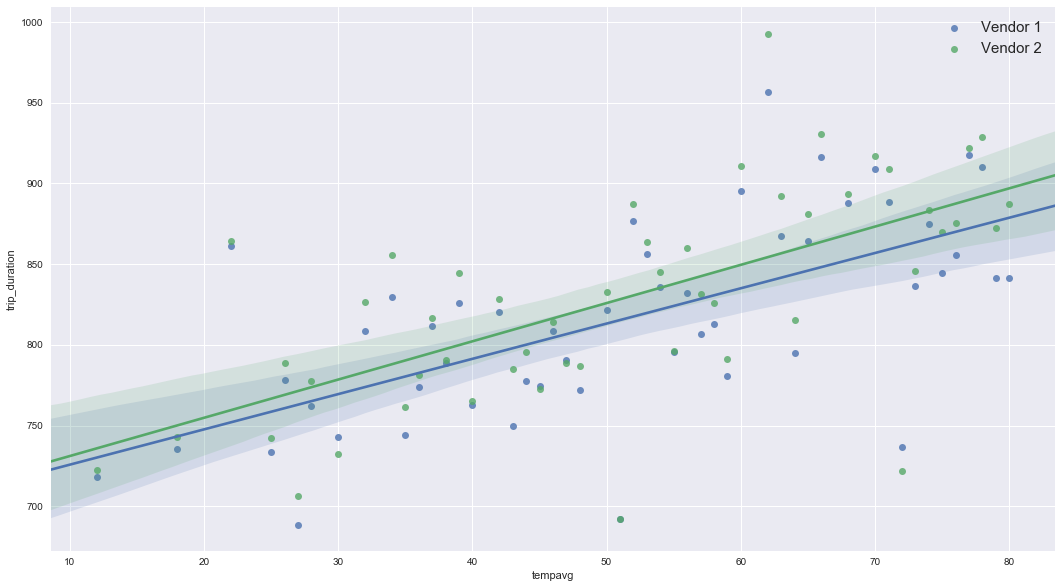

In [124]:
df_bar = df_join.groupby(['tempavg','vendor_id'], as_index=False)['trip_duration'].mean()

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(111)

sns.regplot(x='tempavg',y='trip_duration',data=df_bar[df_bar['vendor_id']==1],fit_reg=True, ax=ax1, label = 'Vendor 1')
sns.regplot(x='tempavg',y='trip_duration',data=df_bar[df_bar['vendor_id']==2],fit_reg=True, ax=ax1, label = 'Vendor 2')
ax1.legend(loc=1, prop={'size': 15})


Not much behavior difference between the two vendors with respect to temperature

# Train/Test split

In [24]:
np.random.seed()
msk = np.random.rand(len(df_join)) < 0.8
dfTrain = df_join[msk]
dfTest = df_join[~msk]

print len(dfTrain)
print len(dfTest)

1164618
291773


# Multi Variate Regression Analysis

Let's build and MVR

In [32]:
df_Train_features = pd.DataFrame(dfTrain.copy())
df_Train_features = df_Train_features.drop(['trip_duration','Date','within_min_range'],axis=1)
features = list(df_Train_features.columns[1:])
del df_Train_features
features

 

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'total_distance',
 'temphigh',
 'tempavg',
 'templow',
 'dewhigh',
 'dewavg',
 'dewlow',
 'humhigh',
 'humavg',
 'humlow',
 'seahigh',
 'seaavg',
 'sealow',
 'vishigh',
 'visavg',
 'vislow',
 'windhigh',
 'windavg',
 'preceiphigh',
 'precipsum',
 'Precip',
 'Snow']

Prepare for clustering the pickup coordinates:

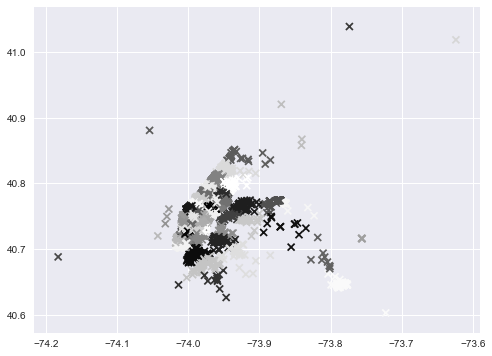

In [160]:
model = KMeans(n_clusters=50)
model = model.fit(scale(dfTrain[['pickup_longitude', 'pickup_latitude']]))
plt.figure(figsize=(8, 6))
plt.scatter(dfTrain['pickup_longitude'], dfTrain['pickup_latitude'], c=model.labels_.astype(float),marker='x')

Prepare for clustering the dropoff coordinates:

In [11]:
dfTrain.dtypes

vendor_id                      int64
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
within_min_range               int64
total_distance                 int32
Date                  datetime64[ns]
temphigh                       int64
tempavg                        int64
templow                        int64
dewhigh                        int64
dewavg                         int64
dewlow                         int64
humhigh                        int64
humavg                         int64
humlow                         int64
seahigh                      float64
seaavg                       float64
sealow                       float64
vishigh                        int64
visavg                         int64
vislow                         int64
windhigh                       int64
w

MVR starts here

In [27]:
features=['vendor_id','passenger_count','store_and_fwd_flag','total_distance','temphigh','tempavg','templow','dewhigh','dewavg','dewlow','humhigh','humavg','humlow','vishigh','visavg','vislow','windhigh','windavg','preceiphigh']
X = scale(dfTrain[features])
y = dfTrain['trip_duration']

clf = ExtraTreesRegressor()
est = clf.fit(X,y)

clf.score(scale(dfTest[features]),dfTest['trip_duration'])

#est.summary()

0.32923359566959309

# Test- Mania

In [ ]:
test_file = "E:/GoogleDrive/Interests/Machine_Learning/KAGGLE_COMPETITIONS/test/test.csv"
df_Test = pd.read_csv(test_file, header = 0)

df_Test['pickup_datetime'] = pd.to_datetime(df_Test['pickup_datetime'])
#df_Test['dropoff_datetime'] = pd.to_datetime(df_Test['dropoff_datetime'])
df_w['Date'] = pd.to_datetime(df_w['Date'])

d={'Y':1 , 'N':0}
df_Test['store_and_fwd_flag'] = df_Test['store_and_fwd_flag'].map(d)
df_Test['total_distance'] = df_Test.apply(lambda x: vincenty((x['pickup_longitude'],x['pickup_latitude']), (x['dropoff_longitude'],   x['dropoff_latitude'])).feet, axis=1).astype(int)

df_Test['Date']=df_Test['pickup_datetime'].dt.year.map(str)+'-'+df_Test['pickup_datetime'].dt.month.map(str)+'-'+df_Test['pickup_datetime'].dt.day.map(str)
df_Test['Date']=pd.to_datetime(df_Test['Date'])
df_w['Date']=pd.to_datetime(df_w['Date'])

df_join_Test=df_Test[df_Test['within_min_range']<130].merge(df_w, on='Date', how='inner')


df_join_Test.head()
df_join_Test = df_join_Test.drop(['id','pickup_datetime','Events'],axis=1)
print "The deed is done"

clf.score(scale(df_join_Test[features]),df_join_Test['trip_duration'])

## Using Random forests

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [265]:
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(n_estimators=100) #means make 1000 random forests
clf = clf.fit(X, y)

#dfTest.head()

#dtTrainResults_RF=DataFrame(clf.predict(dfTrain[features]),columns=list([['Survived']]))
dtTestResults_RF=DataFrame(clf.predict(dfTest[features]),columns=list([['Survived']]))

#accuracy_score(dfTrain['Survived'], dtTrainResults_RF['Survived'], sample_weight=None)
accuracy_score(dfTest['Survived'], dtTestResults_RF['Survived'], sample_weight=None)

#RFE#
#rfe = RFE(clf, 3)
#rfe.fit(X, y)
#dtTestResults_RF=DataFrame(clf.predict(dfTest[features]),columns=list([['Survived']]))
#print accuracy_score(dfTest['Survived'], dtTestResults_RF['Survived'], sample_weight=None)

0.81714285714285717

# Results/Testing

Now let's perform prediction on original Test dataset

In [266]:
#Now performing this on real test set
##################
# 1 #Loading file
##################
test_file = "E:/2- GoogleDrive (Total 15GB)/Interests/Machine Learning/Udemy - Data Science and Machine Learning with Python/DataScience/TitanicTest.csv"
dfTestFinal = pd.read_csv(test_file,header=0)

##################
# 2 #Rectifying missing values
##################
d = {'male': 1, 'female': 0}
dfTestFinal['Sex'] = dfTestFinal['Sex'].map(d)
d = {'S': 0, 'Q': 1 ,'C':2}
dfTestFinal['Embarked']=dfTestFinal['Embarked'].map(d)
missFix_Test=dfTestFinal[features]
fill_NaN_Test = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_DF_Test = pd.DataFrame(fill_NaN_Test.fit_transform(missFix_Test))
imputed_DF_Test.columns = missFix_Test.columns
imputed_DF_Test.index = missFix_Test.index

##################
# 3 #Performing Prediction
##################
clf.predict(imputed_DF_Test[features])
dtTestResults_RF_Final=DataFrame(clf.predict(imputed_DF_Test[features]),columns=list([['Survived']]))

#RFE#
#rfe.predict(imputed_DF_Test[features])
#dtTestResults_RF_Final=DataFrame(rfe.predict(imputed_DF_Test[features]),columns=list([['Survived']]))

##################
# 4 #Exporting Results
##################
Results_Main = dfTestFinal.join(dtTestResults_RF_Final['Survived'])
results_file = "E:/2- GoogleDrive (Total 15GB)/Interests/Machine Learning/Udemy - Data Science and Machine Learning with Python/DataScience/TitanicResults.csv"
Results_Main.to_csv(results_file)


## Tree Graphical Representation

Display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "Not Survived" and 5 "Survived" by the time we get to that point. value = [3. 0.] means 3 Not Survived and 0 Survived.

In [417]:
#Added to fix "GraphViz's executables not found" issue
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [245]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  #To save tree in it in next step

tree.export_graphviz(
                    clf, #the fitted tree itself
                    out_file=dot_data,  #Save the output tree in this variable in dotted format
                    feature_names=features #Input features to the tree for them to be displayed in tree
                    )  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  #convert dotted format to visual graph
Image(graph.create_png())  #Convert 'graph' image above to png

NameError: name 'clf' is not defined

# ROUGH WORK!

**Following was just testing to use OLS for finding missing values**

In [289]:
#Age_NMiss = df[df.Age.notnull()] #This is data where we have Age
#Age_Miss = df[df.Age.isnull()] #This is data where we DO NOT have Age

#Age_NMiss_Train = Age_NMiss[80:]
#Age_NMiss_Test = Age_NMiss[:80]

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import itertools

scale = StandardScaler()

#Columns list to consider for X
potentialFeatures=np.array(['Survived','Pclass','SibSp','Parch','Sex']).tolist()

#Making Y
#y=Age_NMiss_Train['Age']
y=scale.fit_transform(Age_NMiss_Train['Age'].as_matrix())


#Setting temporary values
max_X = 0.0

for iteration in range(1,len(potentialFeatures)+1):
    for stuff in itertools.combinations(potentialFeatures, iteration):
        Age_features=np.array(stuff).tolist()
        #Making X
        X = Age_NMiss_Train[Age_features]
        X[Age_features] = scale.fit_transform(X[Age_features].as_matrix())
        #Making OLS Model
        est = sm.OLS(y, X).fit()
        #Get max
        if max_X < est.rsquared:
            max_X=est.rsquared
            best_Features=stuff
            print str(max_X) + " " + str(Age_features)

print "and the final is"
bestFeatureFinal=np.array(best_Features).tolist()
X = Age_NMiss_Train[bestFeatureFinal]
X[bestFeatureFinal] = scale.fit_transform(X[bestFeatureFinal].as_matrix())
est2 = sm.OLS(y, X).fit()
print str(est2.rsquared) + str(bestFeatureFinal)

#print est2.predict(scale.fit_transform(Age_NMiss_Test[bestFeatureFinal].as_matrix()),Age_NMiss_Test['Age'])
#y=scale.inverse_transform(est2.predict(Age_NMiss_Test[bestFeatureFinal]))
#print y


C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

0.0066135016075 ['Survived']
0.127541486462 ['Pclass']
0.183104766203 ['Survived', 'Pclass']
0.202298667301 ['Pclass', 'SibSp']
0.25493576747 ['Survived', 'Pclass', 'SibSp']
0.257893052876 ['Survived', 'Pclass', 'SibSp', 'Parch']
0.25789313005 ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex']
and the final is
0.25789313005['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex']


C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
